In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
all_dates = session.query(Measurement.date).all()
most_recent = max(all_dates)


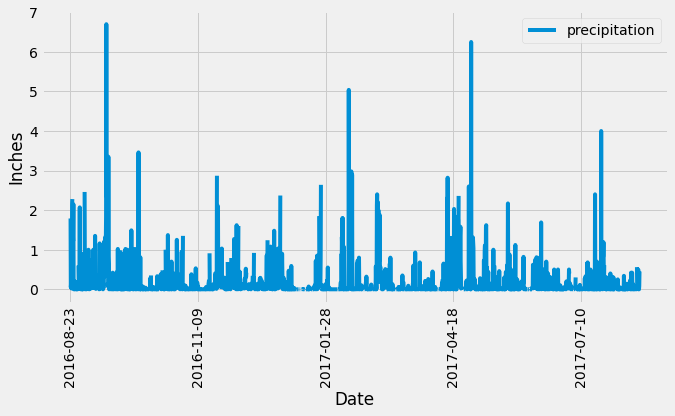

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
most_recent_dt = dt.datetime.strptime(most_recent[0], '%Y-%m-%d').date()
lower_date = most_recent_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
recent_dates = session.query(Measurement).\
    filter(Measurement.date >= lower_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.read_sql(recent_dates.statement, recent_dates.session.bind)
measurement_df = measurement_df.set_index('date').\
                 rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date
measurement_df = measurement_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
measurement_df.plot(y='precipitation', figsize=(10,5), ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')

plt.show()

In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
station_counts = session.query(Measurement).\
                 group_by('station').count()
station_counts

9

In [93]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.id)).\
                 group_by('station').\
                 order_by(func.count(Measurement.id).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [111]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').first()
min_temp = session.query(func.min(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).\
              filter(Measurement.station == 'USC00519281').first()

print(f'The highest temp recorded at USC00519281 was {max_temp[0]}.')
print(f'The lowest was {min_temp[0]}.')
print(f'The average temp was {avg_temp[0]}.')


The highest temp recorded at USC00519281 was 85.0.
The lowest was 54.0.
The average temp was 71.66378066378067.


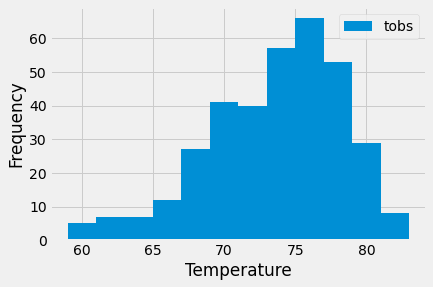

In [125]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_df = measurement_df.loc[measurement_df['station'] == 'USC00519281']

fig, ax = plt.subplots()
active_station_df[['tobs']].plot.hist(ax=ax, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close session

In [126]:
# Close Session
session.close()